In [2]:
#!pip install fastdtw

     |████████████████████████████████| 133 kB 1.3 MB/s eta 0:00:01
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp38-cp38-linux_x86_64.whl size=597108 sha256=3e3cbd4051442999b5fcd82087c29022c66a8439287f51f1f72e98b1b04c1f2b
  Stored in directory: /home/arturo/.cache/pip/wheels/e9/ac/30/c962f9d759dd68cb5482727c44441fdfb48040fdbe983857e8
Successfully built fastdtw


In [1]:
#cargamos librerias
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
import pandas as pd 
from scipy import ndimage

import numpy as np
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw

from scipy.cluster.hierarchy import complete, fcluster,dendrogram
from scipy.spatial.distance import pdist
from joblib import Parallel,delayed
from numba import jit


In [2]:
data=pd.read_csv("../../datos/consumo_aggbyday_filledzeros_samelength.csv")
data.head()

,DATE,DELTA_ID1,DELTA_ID2,DELTA_ID3,DELTA_ID4,DELTA_ID5,DELTA_ID6,DELTA_ID7,DELTA_ID8,DELTA_ID9,...,DELTA_ID2738,DELTA_ID2739,DELTA_ID2740,DELTA_ID2741,DELTA_ID2742,DELTA_ID2743,DELTA_ID2744,DELTA_ID2745,DELTA_ID2746,DELTA_ID2747
0,2019-02-01,800,0,49200,25260,44496,8000,4500,400,10900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-02,4700,0,38100,24171,0,1100,3600,0,30500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-02-03,600,0,31300,26641,0,6900,42600,0,20500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-02-04,1200,0,36200,41200,0,27196,43300,700,28700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-02-05,4400,0,38000,26900,0,23092,6300,0,15000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.fillna(0,inplace=True)
data_mtx=data.iloc[:,1:].to_numpy()

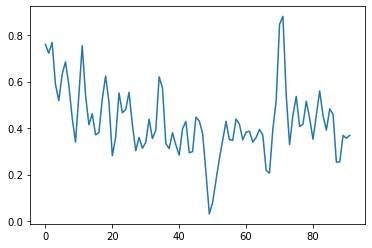

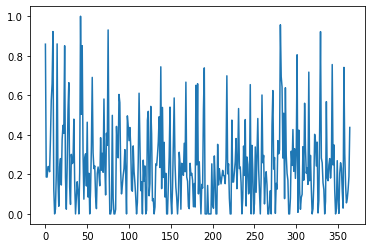

In [4]:
data_filtered=ndimage.gaussian_filter(data_mtx,[3,0],0)
scaler=MinMaxScaler()
data_pre=scaler.fit_transform(data_filtered)
data_pre_sub=data_pre[::4,:].copy()
data_pre_sub=ndimage.gaussian_filter(data_pre_sub,[0.5,0],0)
plt.plot(data_pre_sub[:,45])
plt.figure()
plt.plot(scaler.fit_transform(data_mtx)[:,45])

In [35]:
%time distance, path = fastdtw(data_pre[:,40], data_pre[:,40], dist=euclidean)


CPU times: user 32.7 ms, sys: 3.97 ms, total: 36.6 ms
Wall time: 46.9 ms


In [5]:
n=400
intervalos=[2450] #350,700,1050,1400,1750,2100,
for k in intervalos:
    d=np.zeros((n,n))
    m=k
    if (m+n>2747):
        maxx=2747
    else:
        maxx=m+n
    for i,i_aux in enumerate(range(m,maxx)):
        print(i,i_aux)
        for j,j_aux in enumerate(range(i_aux,maxx)):
            distance, _ = fastdtw(data_pre_sub[:,i_aux], data_pre_sub[:,j_aux], dist=euclidean)
            d[i,j]=distance

    np.save(f"distance_empieza_{k}_len400_2",d)

0 2450
1 2451
2 2452
3 2453
4 2454
5 2455
6 2456
7 2457
8 2458
9 2459
10 2460
11 2461
12 2462
13 2463
14 2464
15 2465
16 2466
17 2467
18 2468
19 2469
20 2470
21 2471
22 2472
23 2473
24 2474
25 2475
26 2476
27 2477
28 2478
29 2479
30 2480
31 2481
32 2482
33 2483
34 2484
35 2485
36 2486
37 2487
38 2488
39 2489
40 2490
41 2491
42 2492
43 2493
44 2494
45 2495
46 2496
47 2497
48 2498
49 2499
50 2500
51 2501
52 2502
53 2503
54 2504
55 2505
56 2506
57 2507
58 2508
59 2509
60 2510
61 2511
62 2512
63 2513
64 2514
65 2515
66 2516
67 2517
68 2518
69 2519
70 2520
71 2521
72 2522
73 2523
74 2524
75 2525
76 2526
77 2527
78 2528
79 2529
80 2530
81 2531
82 2532
83 2533
84 2534
85 2535
86 2536
87 2537
88 2538
89 2539
90 2540
91 2541
92 2542
93 2543
94 2544
95 2545
96 2546
97 2547
98 2548
99 2549
100 2550
101 2551
102 2552
103 2553
104 2554
105 2555
106 2556
107 2557
108 2558
109 2559
110 2560
111 2561
112 2562
113 2563
114 2564
115 2565
116 2566
117 2567
118 2568
119 2569
120 2570
121 2571
122 2572
123

In [75]:
#np.save("distance_400_1",d)

In [6]:
ls

clustering_1.Rmd                  distance_empieza_1750_len400.npy
clustering_2.Rmd                  distance_empieza_2100_len400.npy
clusterizacion.Rproj              distance_empieza_2450_len400.npy
distance_400.npy                  distance_empieza_350_len400.npy
distance_empieza_1050_len400.npy  distance_empieza_700_len400.npy
distance_empieza_1400_len400.npy  dtw_clustering.ipynb


In [7]:
a=complete(d)

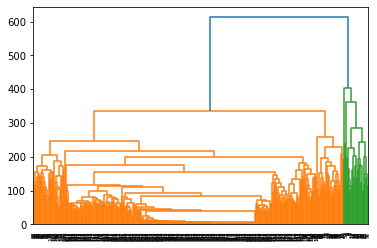

In [8]:
dendrogram(a);

In [9]:
index=fcluster(a,300,criterion="distance")
index

array([4, 2, 2, 4, 5, 4, 4, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 4, 4, 2, 2,
       2, 4, 2, 2, 2, 4, 2, 4, 1, 2, 2, 4, 4, 4, 4, 4, 2, 4, 1, 2, 2, 1,
       1, 3, 2, 4, 2, 1, 4, 4, 3, 1, 4, 4, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 4, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

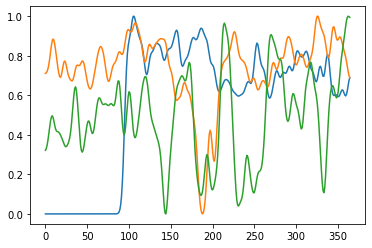

In [21]:
a=data_pre[:,:400][:,index==1]
#for i in range(a.shape[1]):
#    plt.plot(a[:,i])
plt.plot(a[:,5])
plt.plot(a[:,8])
plt.plot(a[:,2])

In [55]:
data_pre[:,:100][:,index==1].shape

(365, 2)

## Paralelización del trabajo

Ha funcionado regular diria yo.

In [ ]:
"""def func(k):
    n=400
    #intervalos=[350,1050,1400,1750,2100,2450,2747] #700
    #for k in intervalos:
    d=np.zeros((n,n))
    m=k
    for i,i_aux in enumerate(range(m,m+n)):
        print(i)
        for j,j_aux in enumerate(range(i_aux,m+n)):
            distance, _ = fastdtw(data_pre_sub[:,i_aux], data_pre_sub[:,j_aux], dist=euclidean)
            d[i,j]=distance

    np.save(f"distance_empieza_{k}_len400",d)"""

In [ ]:
"Parallel(n_jobs=2, require='sharedmem')(delayed(func)(i) for i in [1050,1400,1750,2100,2450,2747] )"

## Solape de resultados

In [93]:
#cargamos los datos
data1=np.load("distance_empieza_2450_len400.npy")
data2=np.load("distance_empieza_350_len400.npy")

In [94]:
data1.shape

(400, 400)

In [56]:
aux2=data2[350:,350:]
aux1=data1[:50,:50]

In [59]:
np.rot90(aux1).T==np.rot90(aux2).T

array([[False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True],
       ...,
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True]])

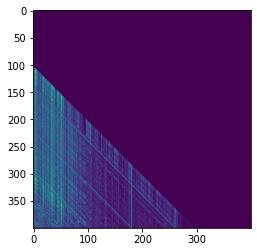

In [95]:
#plt.imshow(data1)
plt.imshow(np.rot90(data1))

In [51]:
np.rot90(data1)

array([[10.34476543,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [15.69622857, 22.17496563,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [18.32538696, 10.52349896, 10.19948905, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [11.81694456, 12.33388905, 18.11213641, ..., 12.47630072,
         0.        ,  0.        ],
       [12.97495127, 18.78311358, 25.72040276, ..., 19.6571838 ,
        20.43432539,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [72]:
a=complete(np.rot90(data2))

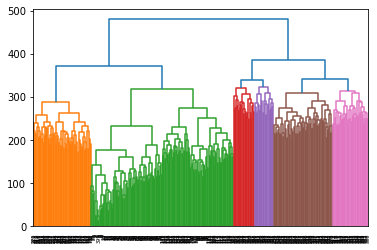

In [73]:
dendrogram(a);

In [74]:
index=fcluster(a,5,criterion="maxclust")

In [75]:
index

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

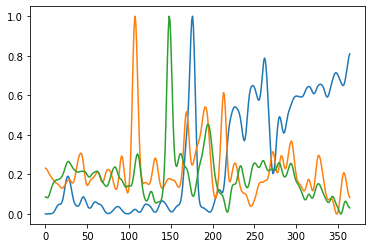

In [78]:
a=data_pre[:,:400][:,index==2]
#for i in range(a.shape[1]):
#    plt.plot(a[:,i])
plt.plot(a[:,1])
plt.plot(a[:,8])
plt.plot(a[:,2])

In [101]:
#voy a separar en 5 clusters todos los grupos que he hecho y los voy a dejar por separado
#luego los compararé entre ellos para asi decidir cual va con cual.
#os.mkdir("datos_cluster")
n=400
intervalos=[0,350,700,1050,1400,1750,2100,2450] #
for k in intervalos:
    if (k+n)>2747:
        maxx=2747
        data1=np.load(f"distance_empieza_{k}_len400.npy")
        data1=data1[:297,:297]
    else:
        maxx=k+n
        data1=np.load(f"distance_empieza_{k}_len400.npy")
    datos=data_mtx[:,k:maxx]
    #print(datos.shape)
    
    print(data1.shape)
    a=complete(np.rot90(data1))
    index=fcluster(a,5,criterion="maxclust")
    for i in range(1,6):
        datos_aux=datos[:,index==i]
        np.save(f"./datos_cluster/timeseries_from_{k}_len400_index_{i}",datos_aux)


(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(400, 400)
(297, 297)


In [87]:
import os

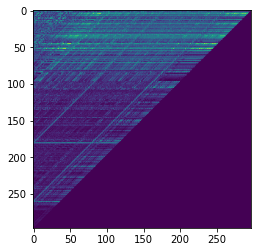

In [100]:
plt.imshow(data1[:297,:297])

In [108]:
aux1=np.load("./datos_cluster/timeseries_from_0_len400_index_1.npy")
aux1_2=np.load("./datos_cluster/timeseries_from_0_len400_index_2.npy")

aux2=np.load("./datos_cluster/timeseries_from_700_len400_index_2.npy")

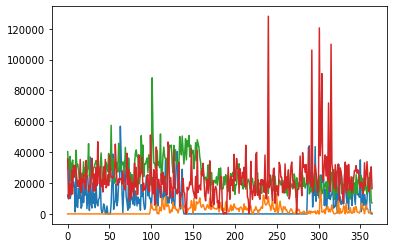

In [104]:
plt.plot(aux1[:,1:10])

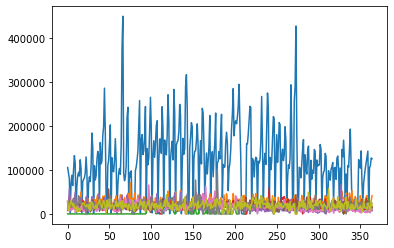

In [107]:
plt.plot(aux1_2[:,1:10])

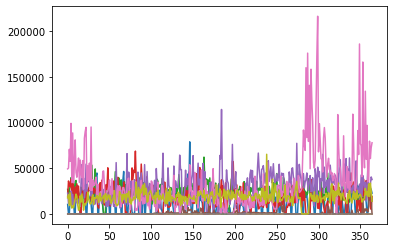

In [109]:
plt.plot(aux2[:,1:10])

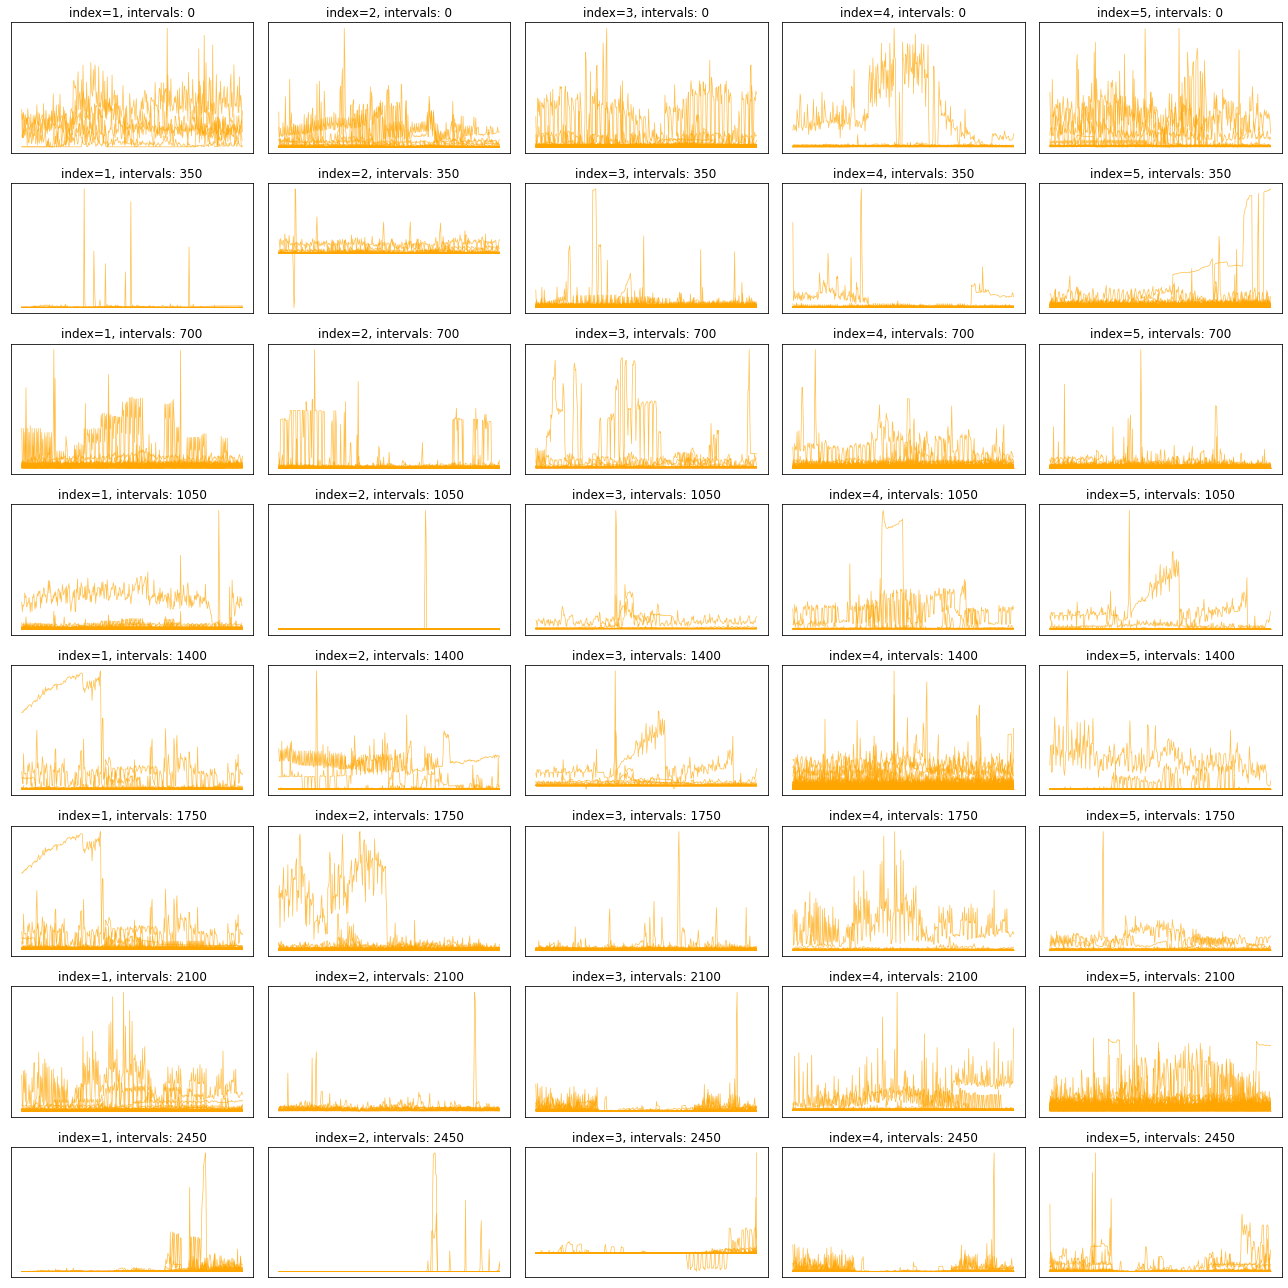

In [5]:
plt.figure(figsize=(18,18))
intervalos=[0,350,700,1050,1400,1750,2100,2450] #

for ind_k,k in enumerate(intervalos):
    for i in range(1,6):
        data=np.load(f"./datos_cluster/timeseries_from_{k}_len400_index_{i}.npy")
        plt.subplot(8,5,ind_k*5+i)
        plt.plot(data[:,:],linewidth=0.7,alpha=0.7,color="orange")
        plt.yticks([])
        plt.xticks([])
        plt.title(f"index={i}, intervals: {k}")
        
plt.tight_layout()

Tenemos clusterizaciones en 5 de agrupaciones de 400 datos.

Para buscarle algun sentido a todo esto, lo mas inteligente sería ver si se solapan las clasificaciones (de las 400 hay 50 que solapan entre los diferentes conjuntos).


In [112]:
#de todos lo datos
intervalos=[0,350,700,1050,1400,1750,2100,2450] #

for ind_k,k in enumerate(intervalos):
    #para una tanda, de clasificaciones, cargamos los 5 clusters, y hacemos una comparacion con
    #cuales pares hay mayor coincidencia y los agrupamos con los datos anteriores
    
    for i in range(1,6):
        data=np.load(f"./datos_cluster/timeseries_from_{k}_len400_index_{i}.npy")
    if ind_k==0:
        #esto es un grupo de 5 listas
        datos_master=data
    

timeseries_from_0_len400_index_1.npy
timeseries_from_0_len400_index_2.npy
timeseries_from_0_len400_index_3.npy
timeseries_from_0_len400_index_4.npy
timeseries_from_0_len400_index_5.npy
timeseries_from_1050_len400_index_1.npy
timeseries_from_1050_len400_index_2.npy
timeseries_from_1050_len400_index_3.npy
timeseries_from_1050_len400_index_4.npy
timeseries_from_1050_len400_index_5.npy
timeseries_from_1400_len400_index_1.npy
timeseries_from_1400_len400_index_2.npy
timeseries_from_1400_len400_index_3.npy
timeseries_from_1400_len400_index_4.npy
timeseries_from_1400_len400_index_5.npy
timeseries_from_1750_len400_index_1.npy
timeseries_from_1750_len400_index_2.npy
timeseries_from_1750_len400_index_3.npy
timeseries_from_1750_len400_index_4.npy
timeseries_from_1750_len400_index_5.npy
timeseries_from_2100_len400_index_1.npy
timeseries_from_2100_len400_index_2.npy
timeseries_from_2100_len400_index_3.npy
timeseries_from_2100_len400_index_4.npy
timeseries_from_2100_len400_index_5.npy
timeseries_from

In [13]:
#cargamos los grupos de 5 de 0 y 350
intervalos=[0,350,700,1050,1400,1750,2100,2450] 
#1
data1=[]
for i in range(1,6):
    data1.append(np.load(f"./datos_cluster/timeseries_from_0_len400_index_{i}.npy"))
print([i.shape for i in data1])
#data1=np.array(data1) # no podemos porque no tienen el mismo tamaño
data2=[]
for i in range(1,6):
    data2.append(np.load(f"./datos_cluster/timeseries_from_350_len400_index_{i}.npy"))
print([i.shape for i in data2])

data_solape=data_mtx[:,350:400]

[(365, 5), (365, 223), (365, 140), (365, 15), (365, 17)]
[(365, 69), (365, 170), (365, 48), (365, 71), (365, 42)]


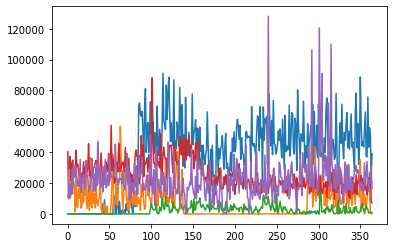

In [23]:
for i in data1[0].T:
    plt.plot(i)

In [30]:
np.all(data1[0].T[0]== data1[0].T,axis=1)

array([ True, False, False, False, False])

In [57]:
[np.all(data_solape.T[25]== i.T,axis=1) for i in data1]

[array([False, False, False, False, False]),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
        False, False, False, False,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, Fal

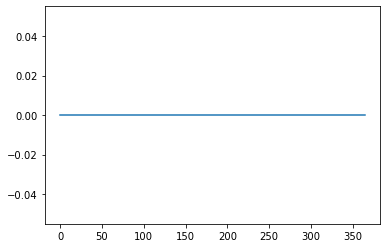

In [58]:
plt.plot(data_solape.T[25])

In [65]:
#ahora queremos saber cual esta en cual
#esto lo haremos haciendo pares de (1,2)
#en este esta en el 1 y este en el 2


for j in data_solape.T:
    #esto nos dice en que grupo esta el solape
    if not np.all(j==0):
        aux=np.array([np.sum(np.all(j== i.T,axis=1),axis=0) for i in data2])
        print(aux)

[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]


In [66]:

for j in data_solape.T:
    #esto nos dice en que grupo esta el solape
    if not np.all(j==0):
        aux=np.array([np.sum(np.all(j== i.T,axis=1),axis=0) for i in data1])
        print(aux)

[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]
[0 1 0 0 0]


Si solo solapan en un conjunto estamos jodidos xd

Ya me he cansado, voy a hacer una agrupacion como me sale de los cojones a ojo de la imagen de todas las agrupaciones:


In [ ]:
a=[[1,2,3,4,5],
   [4,1,3,2,5],
   [3,4,,1]]